# Exercise: Pyomo.DoE

In [15]:
# import TCLab model, simulation, and data analysis functions

### BEGIN SOLUTION
import sys
sys.path.append('../notebooks')
from tclab_pyomo import TCLabExperiment, create_model, extract_results, extract_plot_results, results_summary
### END SOLUTION

# set default number of states in the TCLab model
number_tclab_states = 2

## Load and explore experimental data (step test)

In [16]:
import pandas as pd
file = '../data/tclab_step_test.csv'
df = pd.read_csv(file)
df.head()

,Time,T1,T2,Q1,Q2
0,0.00,22.84,22.52,50.0,0.0
1,1.01,22.84,22.52,50.0,0.0
2,2.01,22.84,22.52,50.0,0.0
3,3.00,22.84,22.52,50.0,0.0
4,4.00,22.84,22.20,50.0,0.0


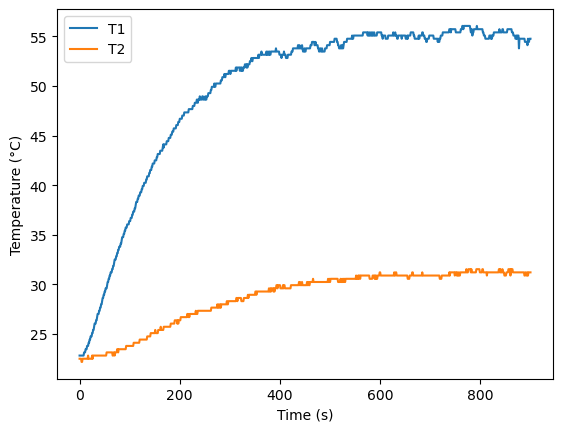

In [17]:
ax = df.plot(x='Time', y=['T1', 'T2'], xlabel='Time (s)', ylabel='Temperature (°C)')

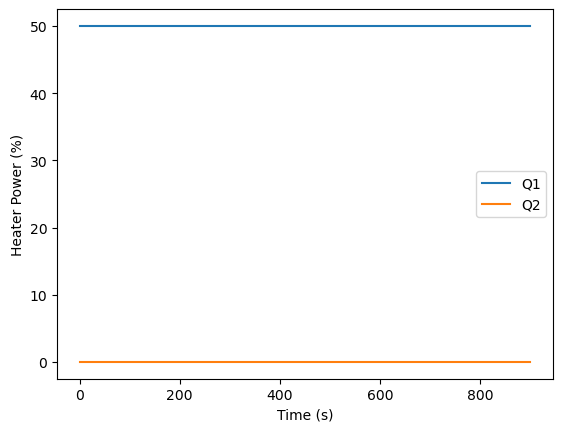

In [18]:
ax = df.plot(x='Time', y=['Q1', 'Q2'], xlabel='Time (s)', ylabel='Heater Power (%)')


In [19]:
tc_data = TCLabExperiment(name="Sine Wave Test for Heater 1",
                            time=df['Time'].values,
                            T1=df['T1'].values,
                            u1=df['Q1'].values,
                            P1=200,
                            TS1_data=None,
                            d1 = None,
                            T2=df['T2'].values,
                            u2=df['Q2'].values,
                            P2=200,
                            TS2_data=None,
                            d2 = None,
                            Tamb=df['T1'].values[0])

## Analyze FIM with Pyomo.DoE (step test)

In [20]:
# Load Pyomo.DoE functions
### BEGIN SOLUTION
from pyomo.contrib.doe import (
    ModelOptionLib,
    DesignOfExperiments,
    MeasurementVariables,
    DesignVariables,
)

from pyomo.environ import SolverFactory
### END SOLUTION

# Copied from previous notebook
theta_values = {'Ua': 0.05147278733764012, 'Ub': 0.0005342082856927798, 'inv_CpH': 0.14622879403418604, 'inv_CpS': 99.99999754623846}

In [21]:
# Get time points for control decisions
### BEGIN SOLUTION
t_control = tc_data.time
### END SOLUTION

# Define the measurement variables
measurements = MeasurementVariables()
### BEGIN SOLUTION
measurements.add_variables('Ts1', 
                              indices={0: t_control},
                              time_index_position = 0)

### END SOLUTION
print(measurements.variable_names)

['Ts1[0.0]', 'Ts1[1.01]', 'Ts1[2.01]', 'Ts1[3.0]', 'Ts1[4.0]', 'Ts1[5.01]', 'Ts1[6.01]', 'Ts1[7.01]', 'Ts1[8.01]', 'Ts1[9.01]', 'Ts1[10.01]', 'Ts1[11.01]', 'Ts1[12.01]', 'Ts1[13.01]', 'Ts1[14.01]', 'Ts1[15.01]', 'Ts1[16.01]', 'Ts1[17.0]', 'Ts1[18.01]', 'Ts1[19.01]', 'Ts1[20.0]', 'Ts1[21.01]', 'Ts1[22.0]', 'Ts1[23.01]', 'Ts1[24.01]', 'Ts1[25.01]', 'Ts1[26.01]', 'Ts1[27.01]', 'Ts1[28.01]', 'Ts1[29.01]', 'Ts1[30.01]', 'Ts1[31.01]', 'Ts1[32.01]', 'Ts1[33.01]', 'Ts1[34.01]', 'Ts1[35.01]', 'Ts1[36.01]', 'Ts1[37.01]', 'Ts1[38.01]', 'Ts1[39.01]', 'Ts1[40.01]', 'Ts1[41.01]', 'Ts1[42.01]', 'Ts1[43.01]', 'Ts1[44.01]', 'Ts1[45.01]', 'Ts1[46.01]', 'Ts1[47.01]', 'Ts1[48.01]', 'Ts1[49.01]', 'Ts1[50.01]', 'Ts1[51.0]', 'Ts1[52.01]', 'Ts1[53.01]', 'Ts1[54.0]', 'Ts1[55.01]', 'Ts1[56.01]', 'Ts1[57.01]', 'Ts1[58.01]', 'Ts1[59.01]', 'Ts1[60.01]', 'Ts1[61.01]', 'Ts1[62.01]', 'Ts1[63.01]', 'Ts1[64.01]', 'Ts1[65.0]', 'Ts1[66.0]', 'Ts1[67.01]', 'Ts1[68.01]', 'Ts1[69.01]', 'Ts1[70.01]', 'Ts1[71.01]', 'Ts1[72.01]

In [22]:
# Define the design variables
decisions = DesignVariables()

### BEGIN SOLUTION
decisions.add_variables('U1',
                        indices={0: t_control},
                        time_index_position = 0,
                        lower_bounds=0,
                        upper_bounds=100,
                        values=tc_data.u1)
### END SOLUTION

print(decisions.variable_names)

['U1[0.0]', 'U1[1.01]', 'U1[2.01]', 'U1[3.0]', 'U1[4.0]', 'U1[5.01]', 'U1[6.01]', 'U1[7.01]', 'U1[8.01]', 'U1[9.01]', 'U1[10.01]', 'U1[11.01]', 'U1[12.01]', 'U1[13.01]', 'U1[14.01]', 'U1[15.01]', 'U1[16.01]', 'U1[17.0]', 'U1[18.01]', 'U1[19.01]', 'U1[20.0]', 'U1[21.01]', 'U1[22.0]', 'U1[23.01]', 'U1[24.01]', 'U1[25.01]', 'U1[26.01]', 'U1[27.01]', 'U1[28.01]', 'U1[29.01]', 'U1[30.01]', 'U1[31.01]', 'U1[32.01]', 'U1[33.01]', 'U1[34.01]', 'U1[35.01]', 'U1[36.01]', 'U1[37.01]', 'U1[38.01]', 'U1[39.01]', 'U1[40.01]', 'U1[41.01]', 'U1[42.01]', 'U1[43.01]', 'U1[44.01]', 'U1[45.01]', 'U1[46.01]', 'U1[47.01]', 'U1[48.01]', 'U1[49.01]', 'U1[50.01]', 'U1[51.0]', 'U1[52.01]', 'U1[53.01]', 'U1[54.0]', 'U1[55.01]', 'U1[56.01]', 'U1[57.01]', 'U1[58.01]', 'U1[59.01]', 'U1[60.01]', 'U1[61.01]', 'U1[62.01]', 'U1[63.01]', 'U1[64.01]', 'U1[65.0]', 'U1[66.0]', 'U1[67.01]', 'U1[68.01]', 'U1[69.01]', 'U1[70.01]', 'U1[71.01]', 'U1[72.01]', 'U1[73.01]', 'U1[74.0]', 'U1[75.01]', 'U1[76.01]', 'U1[77.01]', 'U1[78

In [23]:
# Define create_model function for Pyomo.DoE

### BEGIN SOLUTION
def create_model_doe(mod=None, model_option="stage2", theta=theta_values):
    return create_model(m=mod, 
                        model_option=model_option, 
                        data=tc_data, 
                        mode='doe', 
                        theta=theta, 
                        integrate_to_initialize=True, 
                        number_of_states=number_tclab_states)
### END SOLUTION

In [24]:
# Create doe_object using DesignOfExperiments

### BEGIN SOLUTION
doe_object1 = DesignOfExperiments(
    theta_values,  # dictionary of parameters
    decisions,  # design variable
    measurements,  # measurement variable
    create_model_doe,  # model
    solver=SolverFactory('ipopt')
)
### END SOLUTION

# Compute and print the FIM at this point
### BEGIN SOLUTION
result = doe_object1.compute_FIM(
    mode='sequential_finite',
    formula = 'central',
    FIM_store_name = "tc_lab_fim.csv"
)
result.result_analysis()
### END SOLUTION

Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation. See http://

In [25]:
# Call out custome function to summarize the results
# and compute the eigendecomposition of the FIM

results_summary(result)

======Results Summary======
Four design criteria log10() value:
A-optimality: 9.5825912037814
D-optimality: 7.75169462928927
E-optimality: -15.521361886757823
Modified E-optimality: 25.083201388263266

FIM:
 [[ 1.88711723e+08 -1.92132341e+08 -8.36680971e+06 -1.04546465e+03]
 [-1.92132341e+08  3.63446492e+09  6.13974556e+07  1.95353824e+04]
 [-8.36680971e+06  6.13974556e+07  1.46900265e+06  3.31088338e+02]
 [-1.04546465e+03  1.95353824e+04  3.31088338e+02  1.05006073e-01]]

eigenvalues:
 [3.64619173e+09 1.78169287e+08 2.84629140e+05 3.01049641e-16]

eigenvectors:
 [[ 5.55173608e-02 -9.98044866e-01  2.87100552e-02 -1.06759796e-13]
 [-9.98313930e-01 -5.59743978e-02 -1.53676369e-02 -5.33299016e-06]
 [-1.69446191e-02  2.78084774e-02  9.99469644e-01 -2.48897590e-06]
 [-5.36617311e-06 -2.29296389e-07  2.40570040e-06  1.00000000e+00]]


## Optimize experiment

In [28]:
# Set Ipopt options
solver = SolverFactory('ipopt')
# solver.options['bound_push'] = 1E-10
solver.options['halt_on_ampl_error'] = 'yes'
solver.options['tol'] = 1E-5
solver.options['acceptable_tol'] = 1E-4
solver.options['max_iter'] = 500
#solver.options['linear_solver'] = 'ma57'

# Create a new DoE object
### BEGIN SOLUTION
doe_object2 = DesignOfExperiments(
    theta_values,  # dictionary of parameters
    decisions,  # design variable
    measurements,  # measurement variable
    create_model_doe,  # model
    solver=solver,
    prior_FIM=None  # prior FIM
)
### END SOLUTION

# Solve the DoE problem
### BEGIN SOLUTION
square_result, optimize_result = doe_object2.stochastic_program(
    if_optimize=True,  # optimize
    if_Cholesky=True,  # use Cholesky decomposition
    scale_nominal_param_value=True,  # scale model parameter value
    objective_option="det",  # objective option
    jac_initial=result.jaco_information,  # initialize Jacobian with prior solution
    step = 0.01  # step size
)
### END SOLUTION

Ipopt 3.13.2: halt_on_ampl_error=yes
tol=1e-05
acceptable_tol=0.0001
max_iter=500


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortr

ValueError: Cannot load a SolverResults object with bad status: error

In [ ]:
# Extract and plot the results using our custom function
### BEGIN SOLUTION
pyomo_doe_results = extract_plot_results(tc_data, optimize_result.model)
### END SOLUTION

In [ ]:
# Compute the FIM at the optimal solution
### BEGIN SOLUTION
optimize_result.result_analysis()
results_summary(optimize_result)
### END SOLUTION